## Build the architecture of LeNet5 from Scratch

# [Link to my Youtube Video Explaining this whole Notebook](https://www.youtube.com/watch?v=Uq5sQUoLXpA&list=PLxqBkZuBynVRyOJs4RWmB_fKlOVe5S8CR&index=9)

[![Imgur](https://imgur.com/yEmSfK0.png)](https://www.youtube.com/watch?v=Uq5sQUoLXpA&list=PLxqBkZuBynVRyOJs4RWmB_fKlOVe5S8CR&index=9)

There are two main steps after that. 

First is initializing the layers that we are going to use in our CNN inside __init__ , and 

Then the other is to define the sequence in which those layers will process the image. This is defined inside the forward function.

![Imgur](https://imgur.com/yrIrojL.png)

The above diagram shows a description of the LeNet-5 architecture as shown in the original document.

 
**Layer 1**- The first layer is the input layer; It is generally not considered a layer of the network as nothing is learned on that layer. The input layer supports 32x32, and these are the dimensions of the images that will be passed to the next layer.

The grayscale images used in the research paper had their pixel values normalized from 0 to 255, to values between -0.1 and 1.175. The reason for normalization is to ensure that the batch of images have a mean of 0 and a standard deviation of 1, the benefits of this is seen in the reduction in the amount of training time. In the image classification with LeNet-5 example below, we’ll be normalizing the pixel values of the images to take on values between 0 to 1.

 
**Layer 2**- Layer C1 is a convolution layer with six 5 × 5 convolution kernels, and the feature allocation size is 28 × 28, whereby input image information can be avoided.

 
**Layer 3**- Layer S2 is the undersampling / grouping layer which generates 6 function graphs of length 14x14. Each cell in every function map is attached to 2x2 neighborhoods at the corresponding function map in C1. 
 
**Layer 4** - C3 convolution layer encompass sixteen 5x5 convolution kernels The input of the primary six function maps C3 is every continuous subset of the 3 function maps in S2, the access of the following six function maps comes from the access of the 4 continuous subsets and the input for the following 3 function maps is crafted from the 4 discontinuous subsets.Finally, the input for the very last function diagram comes from all the S2 function diagrams. 
 
**Layer 5**- Layer S4 is just like S2 with a length of 2x2 and an output of sixteen 5x5 function graphics. 

**Layer 6**- Layer C5 is a convolution layer with one hundred twenty convolution cores of length 5x5. Each cell is attached to the 5x5 neighborhoods along sixteen S4 function charts. Since the function chart length of S4 is likewise 5x5, the output length of C5 is 1 * 1, so S4 and C5 are absolutely linked.

It is referred to as a convolutional layer in preference to a completely linked layer due to the fact if the input of LeNet-5 becomes large and its shape stays unchanged, then its output length is bigger than 1x1, i.e. now no longer a completely linked layer.
 

**Layer 7-** The F6 layer is connected to C5 and 84 feature charts are generated. In the grayscale images used in the research, the pixel values ​​from 0 to 255 were normalized to values ​​between -0.1 and 1,175 The reason for normalization is to make sure the image stack has a mean of 0 and a standard deviation of 1.

The advantages of this are in the reduction of the training time. In the following example we will normalize the pixel values ​​of the images to take values ​​between 0 and 1.

In [27]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
device

device(type='cuda')

In [17]:
!nvidia-smi

Wed Feb 16 15:15:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    35W / 250W |   1065MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
batch_size = 64
num_classes = 10

![Imgur](https://imgur.com/yrIrojL.png)

In [ ]:
#Defining the convolutional neural network
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            # Above is Layer-1 - The input for LeNet-5 is a 32×32 grayscale image which passes through the first convolutional layer with 6 feature maps or filters having size 5×5 and a stride of one. The image dimensions changes from 32x32x1 to 28x28x6.
            
            nn.BatchNorm2d(6),
            nn.ReLU(),
            # Layer-2 - Then average pooling layer or sub-sampling layer with a filter size 2×2 and a stride of two. The resulting image dimensions will be reduced to 14x14x6.          
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )      
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            # Layer-3 Next, there is a second convolutional layer with 16 feature maps having size 5×5 and a stride of 1. In this layer, only 10 out of 16 feature maps are connected to 6 feature maps of the previous layer
            nn.BatchNorm2d(16),
            nn.ReLU(),
            # Layer-4 The fourth layer (S4) is again an average pooling layer with filter size 2×2 and a stride of 2. This layer is the same as the second layer (S2) except it has 16 feature maps so the output will be reduced to 5x5x16.
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.fc = nn.Linear(400, 120)
        ''' Layer-5 The fifth layer (C5) is a fully connected convolutional layer with 120 feature maps each of size 1×1. Each of the 120 units in C5 is connected to all the 400 nodes (5x5x16) in the fourth layer S4. '''
        self.relu = nn.ReLU()
        '''Layer-6 The sixth layer is a fully connected layer (F6) with 84 units. '''
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        ''' Layer-7 - Finally, a fully connected layer ŷ with 10 possible values corresponding to the digits from 0 to 9. Since the MNIST data has 10 classes for each of the 10 numerical digits. '''
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        print('output after layer2', output.size()) # torch.Size([32, 16, 5, 5]
        # inside forward method image dimension are : [batch_size, channels, height, width]
        output = output.reshape(output.size(0), -1)
        # print('output after resize', output.size()) # torch.Size([32, 400])
        output = self.fc(output)
        output = self.relu(output)
        output = self.fc1(output)
        output = self.relu1(output)
        output = self.fc2(output)
        return output


## Reason to reshape after `output = self.layer2(output)`

In PyTorch, images are represented as [channels, height, width], so a color image would be [3, 256, 256].

During the training you will get batches of images, so your shape in the forward method will get an additional batch dimension at dim0: [batch_size, channels, height, width].

So before applying the fully connected layer with output-shape of 400, I have to convert the above 4-D Tensor to a 2-D Tensor. 
And I definitely have to keep the first dimension, which is the batch-size, hence to the `.reshape()` function I am passing the unchanged first dimension of `output.size(0)`

But for the second dimension, I am letting PyTorch to decide based on the Matrix calculation. i.e. the second dimension will be inferred given the first dimension.


-----------------

## where is softmax in above ? 

If you thought that the last layer in a Neural Network should be some sort of activation function like sigmoid() or softmax(), and we dont see that happening here in the above function.

So, where is softmax? And its right here:

```py
criterion = nn.CrossEntropyLoss()

```

Inside `nn.CrossEntropyLoss()` function is handled the softmax computation which, of course, works with the raw output of your last layer

---

## Setting Hyperparameters


### Loading the Dataset
Using torchvision , we will load the dataset as this will allow us to perform any pre-processing steps easily.

In [19]:
class LeNet5(nn.Module):
    def __init__(self,num_classes):
        super(LeNet5,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=(1,1), padding=(0,0)), #Layer 1
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2)) #Layer-2
        )                
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=(1,1), padding=(0,0)), #Layer 3
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2,2)) #Layer 4
        )
        self.fc = nn.Linear(400, 120) # Layer 5
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84) # Layer 6
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes) # Final Layer
        
    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        # print('output after layer2', output.size()) # torch.Size([32, 16, 5, 5]
        output = output.reshape(output.size(0), -1) # See note below for this line
        # print('output after resize', output.size()) # torch.Size([32, 400])
        output = self.fc(output)
        output = self.relu(output)
        output = self.fc1(output)
        output = self.relu1(output)
        output = self.fc2(output)
        return output
        

In [20]:
# Define relevant variables for the ML task

''' Keeping num_classes at 10, as this will be the output shape from the final Layer of the LeNet5 Neural Network model, because, the output layer will have 10 output neurons, since the MNIST data has 10 classes for each of the 10 numerical digits. '''

train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_dataloader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_dataloader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

## Build the architecture of LeNet5 from Scratch

In [21]:
learning_rate = 0.001

model = LeNet5(num_classes).to(device)

#Setting the loss function
criterion = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#this is defined to print how many steps are remaining when training
total_step = len(train_dataloader)

In [22]:
print('Length of train_dataloader ', len(train_dataloader))
print('Length of test_dataloader ', len(test_dataloader))

Length of train_dataloader  938
Length of test_dataloader  157


## Setting Hyperparameters


In [23]:
def train(model, criterion, optimizer, num_epochs=10):
    total_training_loss = []
    total_step = len(train_dataloader)
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        
        for i, (images, labels) in enumerate(train_dataloader):  
            images = images.to(device)
            labels = labels.to(device)
            
            #Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
                
            # Backward and optimize
            optimizer.zero_grad() # Clear the past gradient by set the gradients to zero before every update
            loss.backward() #  calculate the new gradients
            # print('images.size ', images.size(0))
            '''  """ Update the running loss 
            we need to use, loss.item() instead of loss alone in running_loss calculation and averaging. 
            Because loss gives you a grad_function, not a float value. 
            The item() method extracts the loss’s value as a Python float.
            """ '''
            running_loss += loss.item() * images.size(0)
            optimizer.step() # we update the weights 
            
                
            if (i+1) % 400 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                            .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        epoch_loss = running_loss / len(train_dataloader)
        total_training_loss.append(epoch_loss)
        """ To summarize, in the above code what I did is
      
        1. => multiply each average batch loss with batch-length. 
        The batch-length is inputs.size(0) which gives the number total images in each batch. 
        Essentially I am un-averaging the Batch-Loss

        Do this all the batches inside the batch-running loop.
        And then after that loop, i.e. outside the batch-loop and coming back to my epoch-loop
        
        2. => Divide this accumulated un-averaged Batch-loss from all batches, 
        by the number of samples (len(train_dataloader)) to get the exact train loss average for the epoch """
    return total_training_loss

In [24]:
total_training_loss = train(model, criterion, optimizer, num_epochs=30)

Epoch [1/30], Step [400/938], Loss: 0.0270
Epoch [1/30], Step [800/938], Loss: 0.1064
Epoch [2/30], Step [400/938], Loss: 0.0322
Epoch [2/30], Step [800/938], Loss: 0.0453
Epoch [3/30], Step [400/938], Loss: 0.0066
Epoch [3/30], Step [800/938], Loss: 0.0386
Epoch [4/30], Step [400/938], Loss: 0.0346
Epoch [4/30], Step [800/938], Loss: 0.0306
Epoch [5/30], Step [400/938], Loss: 0.0016
Epoch [5/30], Step [800/938], Loss: 0.0295
Epoch [6/30], Step [400/938], Loss: 0.0009
Epoch [6/30], Step [800/938], Loss: 0.0145
Epoch [7/30], Step [400/938], Loss: 0.0020
Epoch [7/30], Step [800/938], Loss: 0.0363
Epoch [8/30], Step [400/938], Loss: 0.0061
Epoch [8/30], Step [800/938], Loss: 0.0026
Epoch [9/30], Step [400/938], Loss: 0.0335
Epoch [9/30], Step [800/938], Loss: 0.0120
Epoch [10/30], Step [400/938], Loss: 0.0395
Epoch [10/30], Step [800/938], Loss: 0.0007
Epoch [11/30], Step [400/938], Loss: 0.0007
Epoch [11/30], Step [800/938], Loss: 0.0060
Epoch [12/30], Step [400/938], Loss: 0.0012
Epoch 

In [25]:
total_training_loss

[10.568266467943882,
 3.527540081909407,
 2.6088559687145545,
 2.1823721174309565,
 1.924547830021688,
 1.6057489041481285,
 1.3537017107074425,
 1.1566425667095708,
 1.1153176984784983,
 0.983036599652807,
 0.8899051300895366,
 0.6929740591073604,
 0.7318501428482301,
 0.7322920497585915,
 0.4553440813554328,
 0.6452689993842532,
 0.5951177723426396,
 0.46549444908607823,
 0.48881708133601715,
 0.4589629755210131,
 0.40898956688392407,
 0.433147037635138,
 0.3640874308061105,
 0.3657881085964735,
 0.3087785066473603,
 0.3707788242852709,
 0.24622227986580741,
 0.282929215015277,
 0.3211896866044501,
 0.24679545621306762]

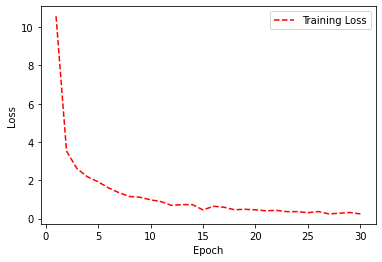

In [28]:

epoch_count = range(1, len(total_training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, total_training_loss, 'r--')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();